# A.IBRAHIM
## INTERN AT UNIFIED MENTOR

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("Amazon Sales data.csv")
print(df.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [2]:
# 1. Sales Performance Overview
total_units_sold = df['Units Sold'].sum()
total_revenue = df['Total Revenue'].sum()
total_cost = df['Total Cost'].sum()
total_profit = df['Total Profit'].sum()

avg_unit_price = df['Unit Price'].mean()
avg_unit_cost = df['Unit Cost'].mean()
avg_profit_per_unit = df['Total Profit'].mean() / df['Units Sold'].mean()

In [3]:
# 2. Sales by Region
sales_by_region = df.groupby('Region').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).sort_values(by='Total Revenue', ascending=False)

In [4]:
# 3. Sales by Item Type
sales_by_item_type = df.groupby('Item Type').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).sort_values(by='Total Revenue', ascending=False)

In [5]:
# 4. Sales Channel Analysis
sales_by_channel = df.groupby('Sales Channel').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
})

In [6]:
# 5. Order Priority Analysis
sales_by_priority = df.groupby('Order Priority').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
})

In [7]:

{
    'Sales Performance Overview': {
        'Total Units Sold': total_units_sold,
        'Total Revenue': total_revenue,
        'Total Cost': total_cost,
        'Total Profit': total_profit,
        'Average Unit Price': avg_unit_price,
        'Average Unit Cost': avg_unit_cost,
        'Average Profit per Unit': avg_profit_per_unit
    },
    'Sales by Region': sales_by_region,
    'Sales by Item Type': sales_by_item_type,
    'Sales by Sales Channel': sales_by_channel,
    'Sales by Order Priority': sales_by_priority
}

{'Sales Performance Overview': {'Total Units Sold': 512871,
  'Total Revenue': 137348768.31,
  'Total Cost': 93180569.91000001,
  'Total Profit': 44168198.39999999,
  'Average Unit Price': 276.7613,
  'Average Unit Cost': 191.048,
  'Average Profit per Unit': 86.11950841439659},
 'Sales by Region':                                    Units Sold  Total Revenue  Total Profit
 Region                                                                    
 Sub-Saharan Africa                     182870    39672031.43   12183211.40
 Europe                                  98117    33368932.11   11082938.63
 Asia                                    59967    21347091.02    6113845.87
 Australia and Oceania                   68325    14094265.13    4722160.03
 Middle East and North Africa            48678    14052706.58    5761191.86
 Central America and the Caribbean       35771     9170385.49    2846907.85
 North America                           19143     5643356.55    1457942.76,
 'Sales by Item 

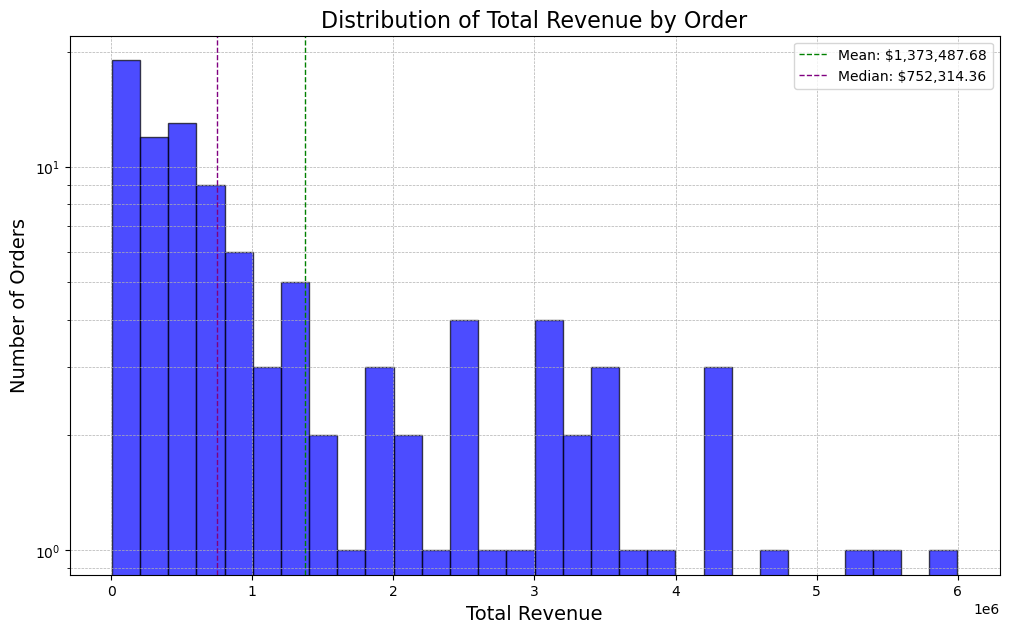

In [8]:
import matplotlib.pyplot as plt

# Extract the 'Total Revenue' from the dataset for plotting
total_revenue = df['Total Revenue'].dropna()

# Plotting the distribution of Total Revenue
plt.figure(figsize=(12, 7))
plt.hist(total_revenue, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Revenue by Order', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Calculating mean and median
mean_revenue = total_revenue.mean()
median_revenue = total_revenue.median()

# Adding mean and median lines
plt.axvline(mean_revenue, color='green', linestyle='dashed', linewidth=1, label=f'Mean: ${mean_revenue:,.2f}')
plt.axvline(median_revenue, color='purple', linestyle='dashed', linewidth=1, label=f'Median: ${median_revenue:,.2f}')

# Adding a legend
plt.legend()

# Show plot
plt.show()


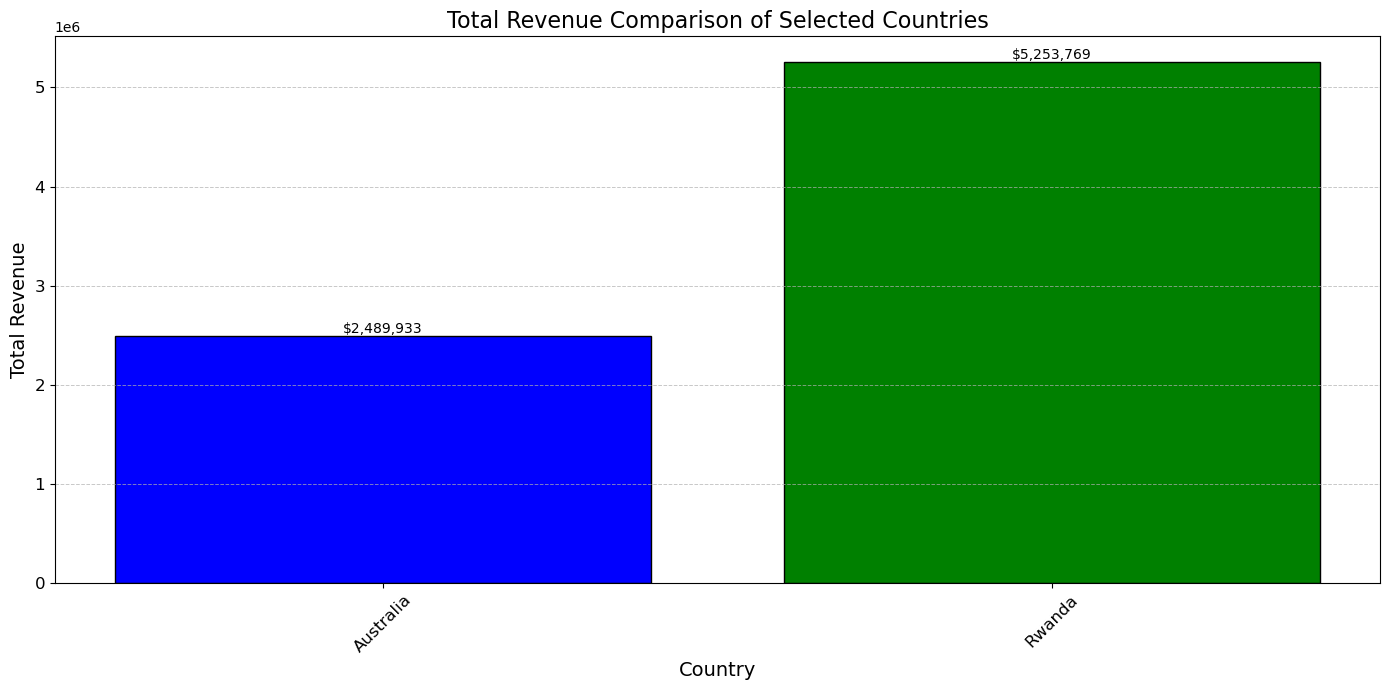

In [9]:
# Selecting five countries from the dataset for comparison
selected_countries = ['Rwanda', 'Australia', 'United States', 'Germany', 'China']

# Summarizing total revenue for these countries
revenue_comparison = df[df['Country'].isin(selected_countries)].groupby('Country')['Total Revenue'].sum()

# Plotting the comparison
plt.figure(figsize=(14, 7))
bars = plt.bar(revenue_comparison.index, revenue_comparison.values, 
               color=['blue', 'green', 'red', 'purple', 'orange'], edgecolor='black')

plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.title('Total Revenue Comparison of Selected Countries', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding text labels for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


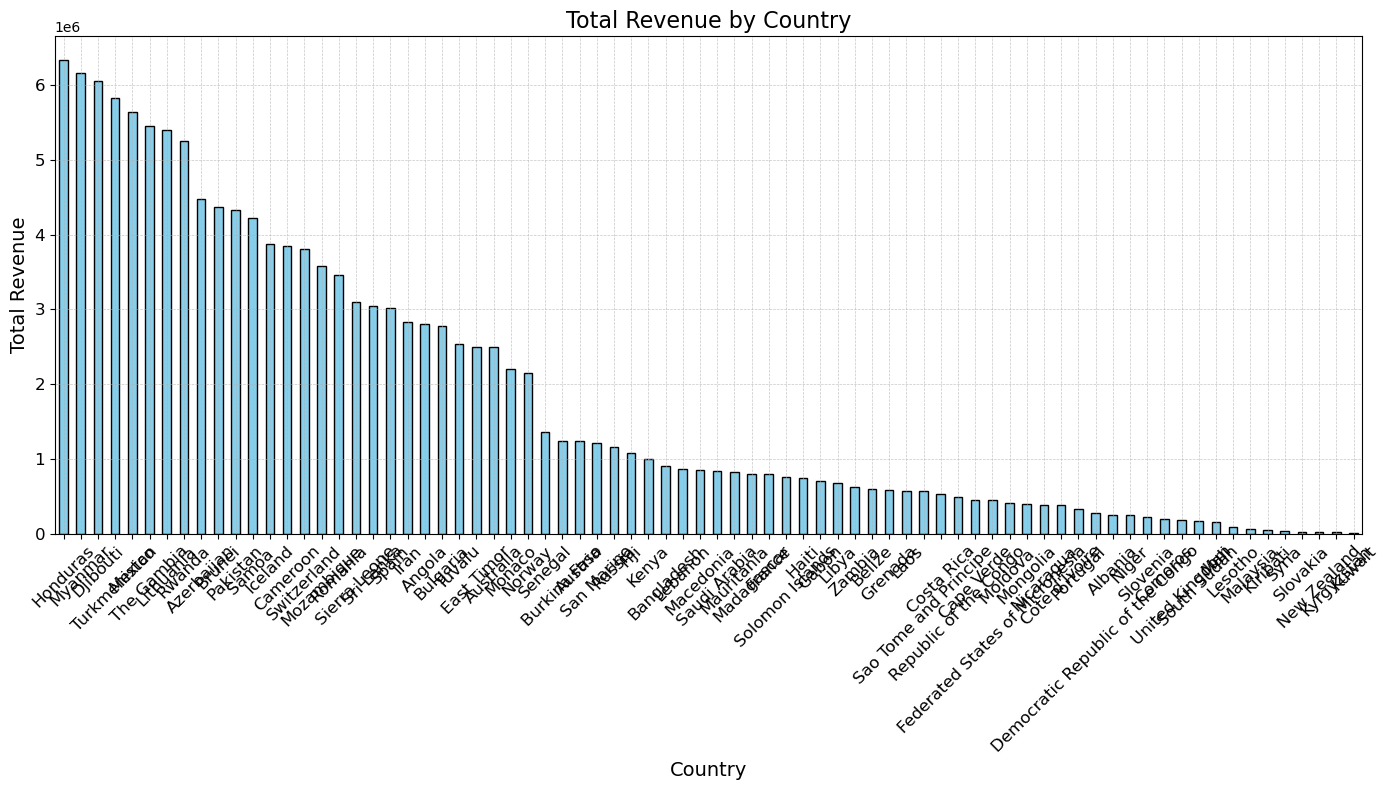

In [10]:
# Grouping the dataset by 'Country' and summing up the 'Total Revenue'
revenue_by_country = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(14, 8))
revenue_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Revenue by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


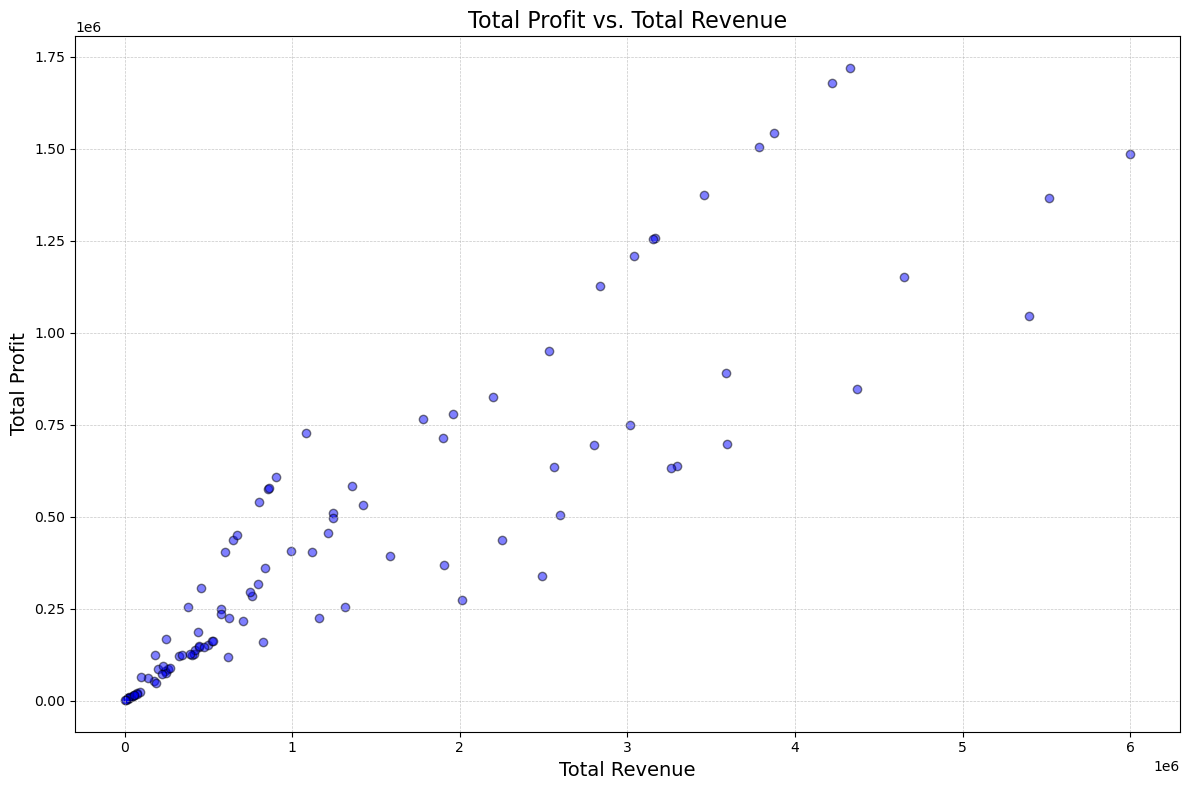

In [21]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains 'Total Profit' and 'Total Revenue' columns

# Plotting the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['Total Revenue'], df['Total Profit'], alpha=0.5, color='blue', edgecolor='black')
plt.title('Total Profit vs. Total Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


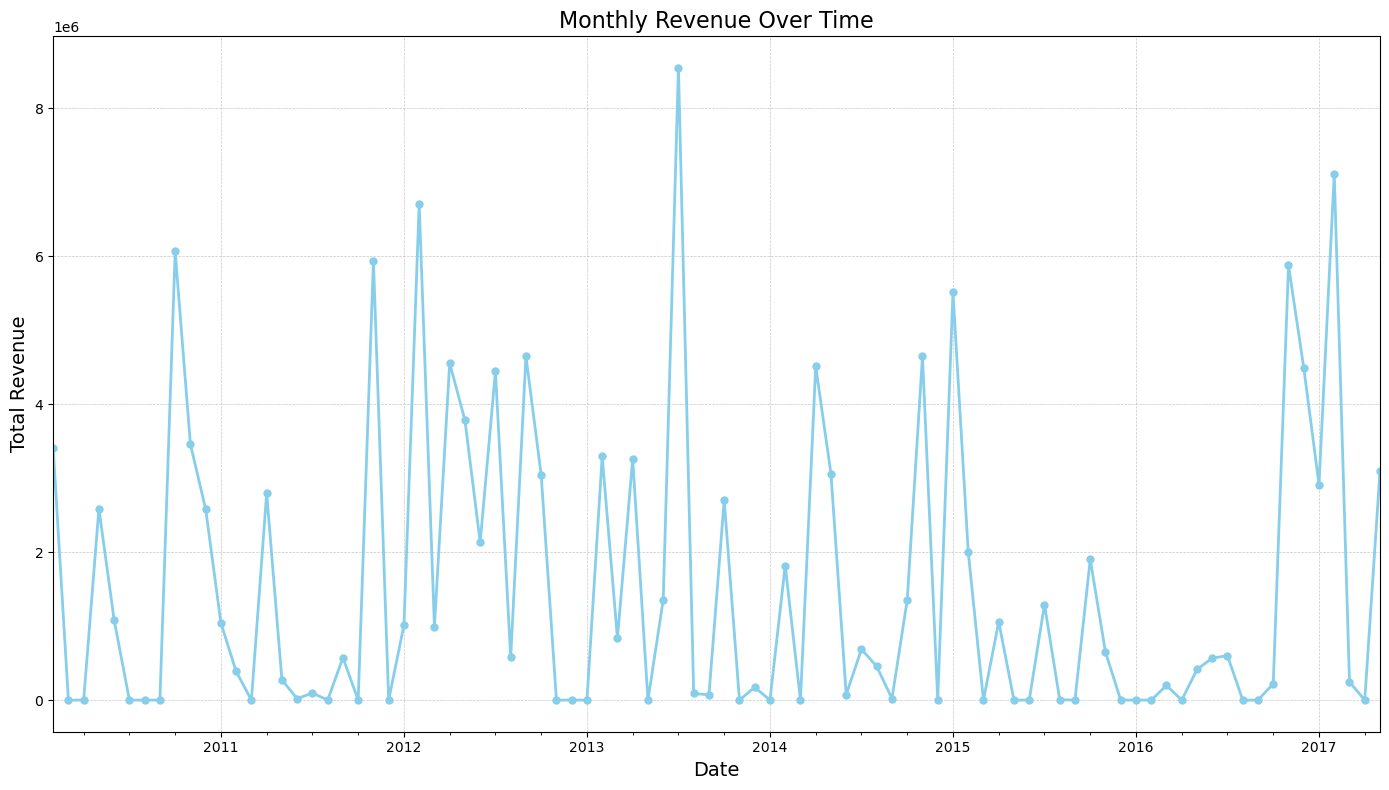

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and contains 'Order Date' and 'Total Revenue' columns

# Convert 'Order Date' to datetime format if it's not already
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample data by month and sum up the revenue for each month
monthly_revenue = df['Total Revenue'].resample('M').sum()

# Plotting the line chart
plt.figure(figsize=(14, 8))
monthly_revenue.plot(kind='line', color='skyblue', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Monthly Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


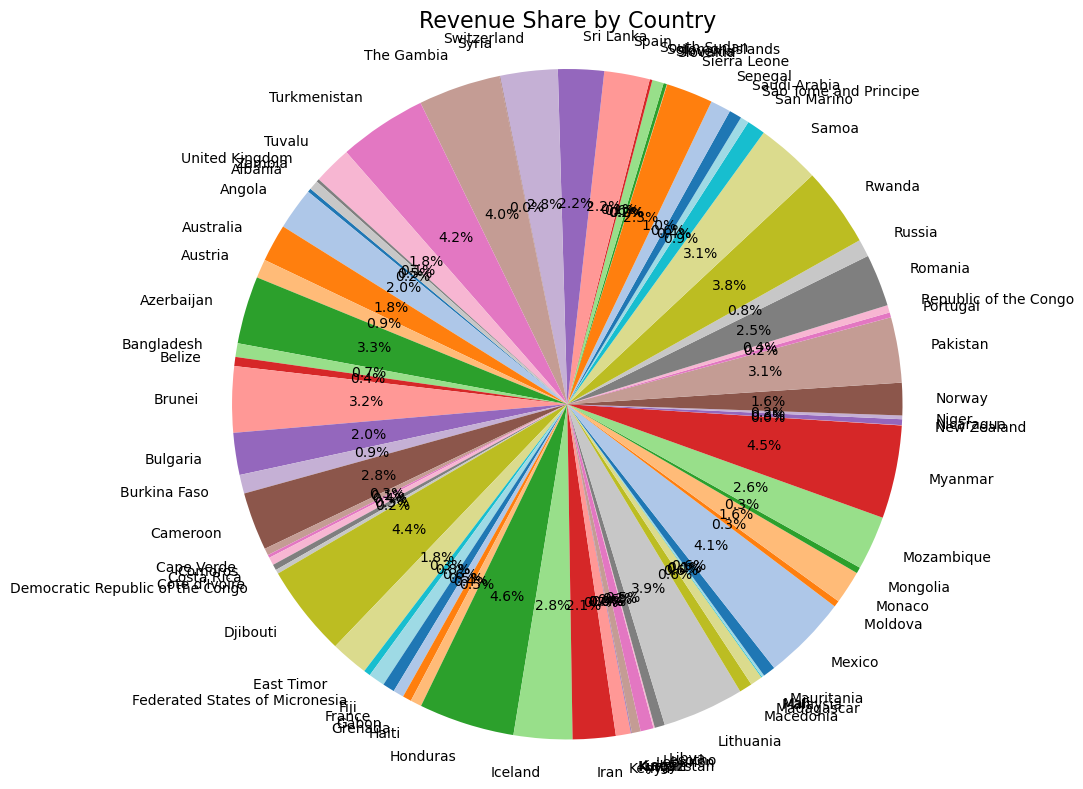

In [24]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and contains 'Country' and 'Total Revenue' columns

# Grouping the data by 'Country' and summing up the 'Total Revenue'
revenue_by_country = df.groupby('Country')['Total Revenue'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(revenue_by_country, labels=revenue_by_country.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab20').colors)
plt.title('Revenue Share by Country', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import plotly.express as px

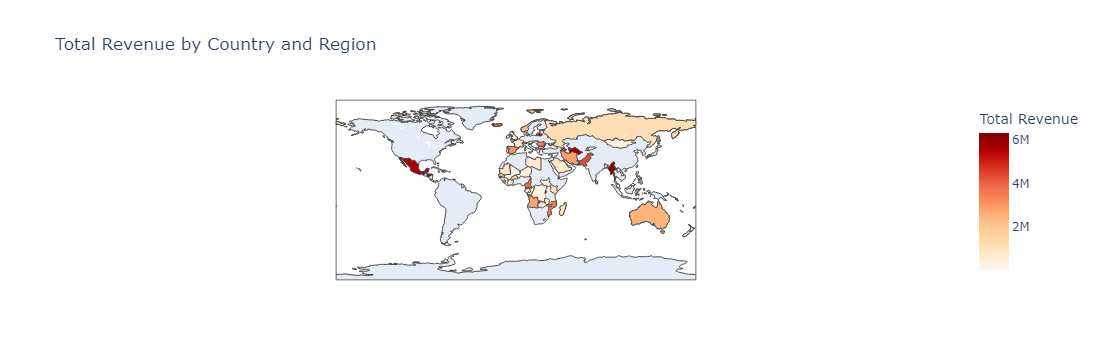

In [18]:
# Summarize the dataset by Region and Country
summary_data = df.groupby(['Region', 'Country']).agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

# Create a choropleth map using Plotly
fig = px.choropleth(summary_data,
                    locations="Country",
                    locationmode='country names',
                    color="Total Revenue",
                    hover_name="Country",
                    hover_data=["Region", "Total Profit", "Units Sold"],
                    color_continuous_scale=px.colors.sequential.OrRd,
                    title="Total Revenue by Country and Region")

# Show the map
fig.show()

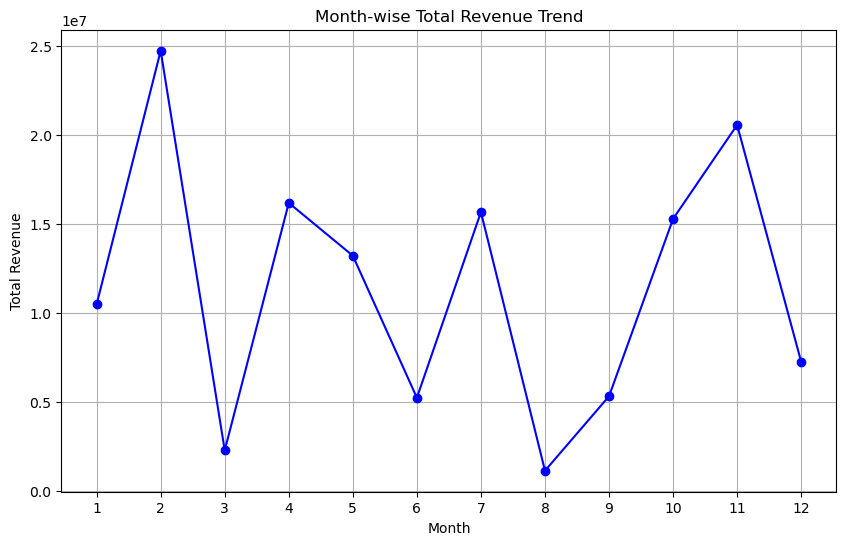

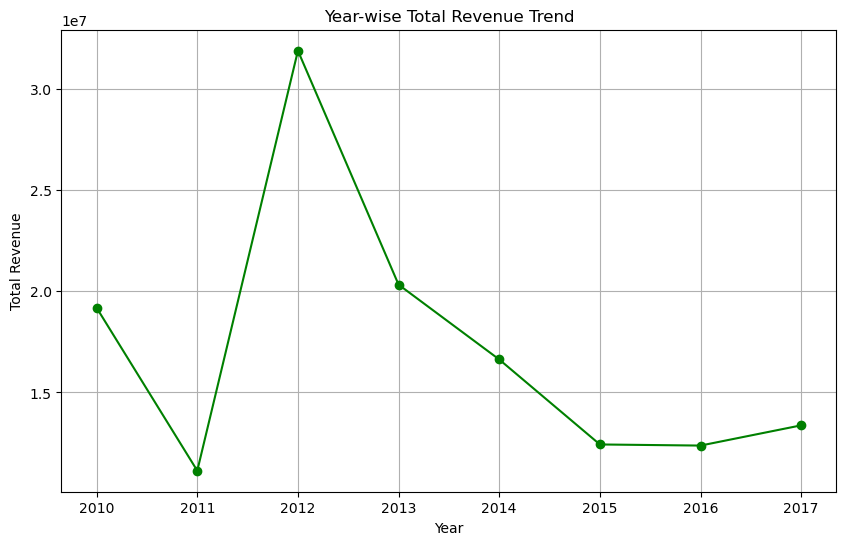

In [20]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year from the 'Order Date'
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Aggregate the data by Month
month_wise_trend = df.groupby('Month')['Total Revenue'].sum().reset_index()

# Aggregate the data by Year
year_wise_trend = df.groupby('Year')['Total Revenue'].sum().reset_index()

# Plotting the Month-wise Trend
plt.figure(figsize=(10, 6))
plt.plot(month_wise_trend['Month'], month_wise_trend['Total Revenue'], marker='o', linestyle='-', color='b')
plt.title('Month-wise Total Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(month_wise_trend['Month'])
plt.grid(True)
plt.show()

# Plotting the Year-wise Trend
plt.figure(figsize=(10, 6))
plt.plot(year_wise_trend['Year'], year_wise_trend['Total Revenue'], marker='o', linestyle='-', color='g')
plt.title('Year-wise Total Revenue Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(year_wise_trend['Year'])
plt.grid(True)
plt.show()